**Function 3: Drug Discovery Problem**

In this example, you are doing drug discovery! You can select three compounds to create a drug, and receive a measurement of the people’s adverse reaction to the drug. You want to make this as close as possible to zero. (hint: one of the variables may not cause any effects on the person).

In [2]:
import numpy as np

from get_init_data import get_inputs, get_outputs

f_num = 3

X_init = get_inputs(f_num)
y_init = get_outputs(f_num)
# print(X_init)
# print(y_init)

In [3]:
from get_query_data import get_inputs, get_outputs

X_q = get_inputs(f_num)
y_q = get_outputs(f_num)
# print(X_q)
# print(y_q)

[0.431257, 0.895431]
[0.821456, 0.390248]
[0.19432, 0.682014, 0.011249]
[0.129382, 0.503612, 0.777124, 0.041672]
[0.964301, 0.306598, 0.758164, 0.118309]
[0.338127, 0.072341, 0.600298, 0.901134, 0.244792]
[0.120936, 0.893025, 0.516204, 0.032114, 0.74219, 0.28831]
[0.024893, 0.310587, 0.498236, 0.865901, 0.702134, 0.139804, 0.603781, 0.003172]
[0.431257, 0.895431]
[0.821456, 0.390248]
[0.19432, 0.682014, 0.011249]
[0.129382, 0.503612, 0.777124, 0.041672]
[0.964301, 0.306598, 0.758164, 0.118309]
[0.338127, 0.072341, 0.600298, 0.901134, 0.244792]
[0.120936, 0.893025, 0.516204, 0.032114, 0.74219, 0.28831]
[0.024893, 0.310587, 0.498236, 0.865901, 0.702134, 0.139804, 0.603781, 0.003172]
[0.557814, 0.91103]
[0.423839, 0.177067]
[0.939684, 0.438755, 0.426575]
[0.439915, 0.427314, 0.95773, 0.471256]
[0.297493, 0.25993, 0.547059, 0.410727]
[0.848123, 0.282866, 0.002497, 0.54845, 0.964839]
[0.24578, 0.13368, 0.704378, 0.80709, 0.748982, 0.40143]
[0.389062, 0.327444, 0.27934, 0.140607, 0.299915, 0

In [6]:
from get_init_data2 import get_inputs, get_outputs

X_init2 = get_inputs(f_num)
y_init2 = get_outputs(f_num)
# print(X_init2)
# print(y_init2)

In [8]:
X = np.concatenate((X_init, X_q, X_init2), axis=0)
y = np.concatenate((y_init, y_q, y_init2), axis=0)

print("Input : Output")
for i, v in enumerate(X):
    print(str(v) + ":" + str(y[i]))
# print("INPUTS")
# print(X)
# print("OUTPUTS")
# print(y)

Input : Output
[0.1715252068810621 0.3439168702758373 0.2487372010692387]:-0.11212220046256897
[0.2421144606124933 0.6440742697791076 0.27243280919945523]:-0.08796286022736445
[0.5349057202251034 0.39850091536763166 0.17338872894567725]:-0.111414654295324
[0.49258141463713434 0.6115931882759961 0.3401763860035727]:-0.034835313350078584
[0.13462166632061112 0.2199172404897456 0.45820621964922703]:-0.04800758439218157
[0.3455232705197697 0.9413598305723256 0.2693634790694064]:-0.11062091307282658
[0.151836632374168 0.43999061896644376 0.990881866558951]:-0.3989255131463011
[0.6455028351793182 0.3971429395797703 0.9197713377032198]:-0.11386851478863991
[0.7469119451655177 0.28419630922573424 0.22629985488752546]:-0.13146060864136055
[0.17047699396968063 0.697032400686134 0.14916943370830027]:-0.09418956091057398
[0.2205493370831766 0.2978252442230862 0.34355534441672586]:-0.04694740582651916
[0.6660136587669346 0.6719851513369297 0.2462952966705313]:-0.10596503573558178
[0.046808949722497

In [10]:
from ba_optimizer_v1 import BayesianOptimizer

optimizer = BayesianOptimizer(np.array(X, dtype=np.float64), y, bounds=(0, 1))

# Re-optimize with updated data
new_submission = optimizer.optimize_step(
    num_candidates=1000,
    acquisition_func='ei',
    kappa=2.0
)

print(f"\nNEW RECOMMENDATION: {new_submission['best_point']}")
print(f"UCB Score: {new_submission['best_acquisition']:.4f}")

BAYESIAN OPTIMIZATION STEP
1. Computing function metrics...
   Current best: -0.0059
   Dataset size: 46
   Estimated noise: 0.0055

2. Updating surrogate model...
GP fitted with kernel: 1.15**2 * RBF(length_scale=0.168) + WhiteKernel(noise_level=0.00945)
Log-marginal likelihood: -51.1501

3. Generating 1000 candidate samples...
4. Computing EI acquisition function...
5. Selecting best points for submission...

RECOMMENDED NEXT POINT:
Location: [0.98915366 0.3390069  0.47657984]
Acquisition: 0.0119
GP Prediction: -0.0195 ± 0.0448

NEW RECOMMENDATION: [0.98915366 0.3390069  0.47657984]
UCB Score: 0.0119


y closest to 0 is  -0.005904023509414486 at:  [0.939684 0.438755 0.426575]


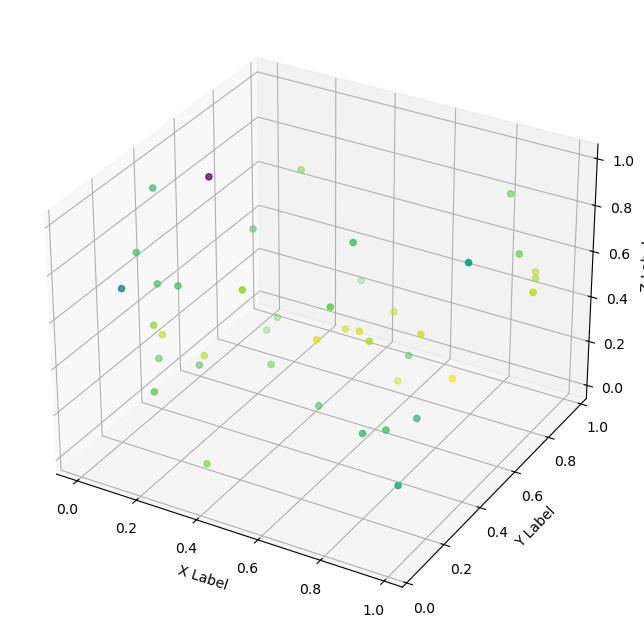

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

y_max = np.max(y)
y_min = np.min(y)

y_close_to_0 = y_max if y_max > y_min else y_min
print("y closest to 0 is ", y_close_to_0, "at: ", X[np.where(y == y_close_to_0)][0])

X = np.array(X, dtype=np.float64)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel, WhiteKernel

kernel = ConstantKernel(1.0, (1e-3, 1e3)) * Matern(length_scale=0.1, length_scale_bounds=(1e-3, 1e1)) + WhiteKernel(noise_level=0.01, noise_level_bounds=(1e-10, 1e-1))

gpr = GaussianProcessRegressor(kernel=kernel,  n_restarts_optimizer=15)

gpr.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=0.1, nu=1.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=15)

In [16]:
from scipy.stats import norm

###### Acquisition Function 3 - Thompson Sampling
x1 = np.linspace(0.73, 0.80, 150)
x2 = np.linspace(0.57, 0.65, 150)
x3 = np.linspace(0.40, 0.48, 150)

X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        for k in range(len(x3)):
            X_grid.append([x1[i], x2[j], x3[k]])

def compute_thompson(x):
    mu, sigma = gpr.predict([x], return_std=True)
    sample = np.random.normal(mu, sigma)
    return sample

thompson_values = [compute_thompson(x) for x in X_grid]

next_idx = np.argmax(thompson_values)
TS_NextQuery = X_grid[next_idx]

print("Thompson Sampling - Next Query: ", TS_NextQuery)

###### Acquisition Function 4 - Bayesian Expected Losses

def compute_expected_loss(x):
    mu, sigma = gpr.predict([x], return_std=True)
    z = (mu - y_max) / sigma
    expected_loss = (mu - y_max) * norm.cdf(z) + sigma * norm.pdf(z)
    return expected_loss

expected_loss_values = [compute_expected_loss(x) for x in X_grid]


next_idx = np.argmin(expected_loss_values)
BL_NextQuery = X_grid[next_idx]

print("Bayesian Expected Loss - Next Query: ", BL_NextQuery)

######## Acquisition Function 5 - Expected Improvement
def compute_expected_improvement(x):
    mu, sigma = gpr.predict([x], return_std=True)
    f_best = np.max(y)
    z = (mu - f_best) / sigma
    ei = (mu - f_best) * norm.cdf(z) + sigma * norm.pdf(z)
    return ei

ei_values = [compute_expected_improvement(x) for x in X_grid]

next_idx = np.argmax(ei_values)
EI_NextQuery = X_grid[next_idx]

print("Expected Improvement - Next Query: ", EI_NextQuery)

KeyboardInterrupt: 

In [19]:
from ba_optimizer_v2 import BayesianOptimizer as BayesianOptimizer_v2
from sklearn.gaussian_process.kernels import Matern, ConstantKernel, WhiteKernel

X = np.array(X, dtype=np.float64)

optimizer_v2 = BayesianOptimizer_v2(X, y, bounds=(0, 1))

kernel = ConstantKernel(1.0, (1e-3, 1e3)) * Matern(length_scale=0.1, length_scale_bounds=(1e-3, 1e1), nu=2.5) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-10, 1e-1))

new_submission = optimizer_v2.optimize_step(
    num_candidates=10000,
    acquisition_func='ei',
    kappa=1.0, kernel=kernel
)

print(f"\n optimizer_v2 NEW RECOMMENDATION: {new_submission['best_point']}")
print(f"optimizer_v2 UCB Score: {new_submission['best_acquisition']:.4f}")

BAYESIAN OPTIMIZATION STEP
1. Computing function metrics...
   Current best: -0.0059
   Dataset size: 46
   Estimated noise: 0.0055

2. Updating surrogate model...
GP fitted with kernel: 1.11**2 * Matern(length_scale=0.179, nu=2.5) + WhiteKernel(noise_level=0.00992)
Log-marginal likelihood: -52.4121

3. Generating 10000 candidate samples...
4. Computing EI acquisition function...
5. Selecting best points for submission...

RECOMMENDED NEXT POINT:
Location: [0.98621991 0.50614063 0.47622174]
Acquisition: 0.0102
GP Prediction: -0.0186 ± 0.0394

 optimizer_v2 NEW RECOMMENDATION: [0.98621991 0.50614063 0.47622174]
optimizer_v2 UCB Score: 0.0102


# Calcualting after 27 May outputs

y closest to 0 is  -0.005904023509414486 at:  [0.939684 0.438755 0.426575]


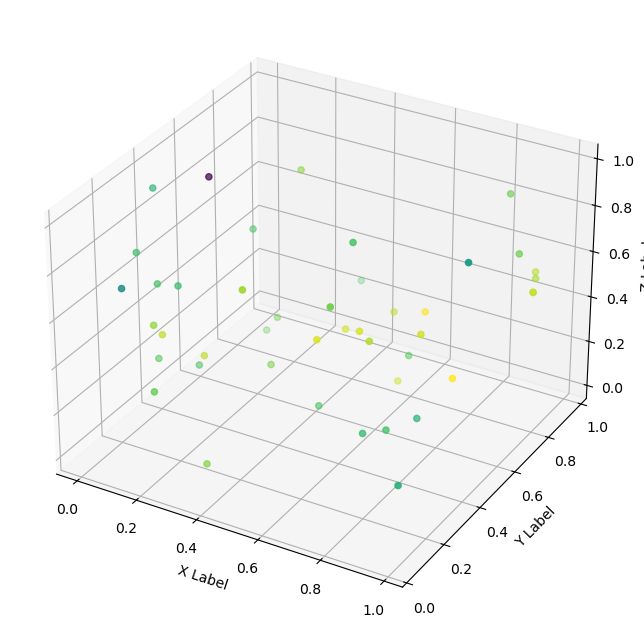

In [22]:
input_may_27 = np.array([0.73, 0.65, 0.48])
output_may_27 = np.float64(-0.008684200172471276)

X = np.append(X, np.array([input_may_27], dtype=np.float64), axis=0)
y = np.append(y, output_may_27)

y_max = np.max(y)
y_min = np.min(y)

y_close_to_0 = y_max if y_max > y_min else y_min
print("y closest to 0 is ", y_close_to_0, "at: ", X[np.where(y == y_close_to_0)][0])

X = np.array(X, dtype=np.float64)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [24]:

optimizer_v2.add_observation(input_may_27, output_may_27)


kernel = ConstantKernel(1.0, (1e-3, 1e3)) * Matern(length_scale=0.1, length_scale_bounds=(1e-3, 1e1), nu=2.5) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-10, 1e-1))
optimizer_v2.optimize_step(
    num_candidates=2000,
    acquisition_func='ucb',
    kernel=kernel)

Added observation: [0.73 0.65 0.48] -> -0.0087
BAYESIAN OPTIMIZATION STEP
1. Computing function metrics...
   Current best: -0.0059
   Dataset size: 47
   Estimated noise: 0.0055

2. Updating surrogate model...
GP fitted with kernel: 1.12**2 * Matern(length_scale=0.186, nu=2.5) + WhiteKernel(noise_level=0.00974)
Log-marginal likelihood: -53.2679

3. Generating 2000 candidate samples...
4. Computing UCB acquisition function...
5. Selecting best points for submission...

RECOMMENDED NEXT POINT:
Location: [0.53179881 0.64811617 0.54105343]
Acquisition: 0.0799
GP Prediction: -0.0289 ± 0.0544


{'best_point': array([0.53179881, 0.64811617, 0.54105343]),
 'best_acquisition': 0.0798752546786787,
 'top_k_points': array([[0.53179881, 0.64811617, 0.54105343],
        [0.62227481, 0.6718146 , 0.61103662],
        [0.57961656, 0.6200968 , 0.60834577],
        [0.56671734, 0.80997851, 0.63646034],
        [0.50016378, 0.60717864, 0.57940512]]),
 'top_k_acquisitions': array([0.07987525, 0.07888048, 0.07811585, 0.07726228, 0.07703417]),
 'gp_predictions': (array([-0.02890312, -0.03214851, -0.03551995, -0.05266631, -0.04020971]),
  array([0.05438919, 0.05551449, 0.0568179 , 0.0649643 , 0.05862194])),
 'current_best_observed': -0.005904023509414486,
 'current_best_point': array([0.939684, 0.438755, 0.426575])}

In [72]:

gpr = GaussianProcessRegressor(kernel=kernel,  n_restarts_optimizer=15)

gpr.fit(X, y)

x1 = np.linspace(0.73, 0.80, 150)
x2 = np.linspace(0.57, 0.65, 150)
x3 = np.linspace(0.40, 0.48, 150)

X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        for k in range(len(x3)):
            X_grid.append([x1[i], x2[j], x3[k]])

def compute_thompson(x):
    mu, sigma = gpr.predict([x], return_std=True)
    sample = np.random.normal(mu, sigma)
    return sample

thompson_values = [compute_thompson(x) for x in X_grid]

next_idx = np.argmax(thompson_values)
TS_NextQuery = X_grid[next_idx]

print("Thompson Sampling - Next Query: ", TS_NextQuery)

Thompson Sampling - Next Query:  [0.7971812080536913, 0.5726845637583892, 0.4166442953020134]


# Calcualting after 2 Jun outputs

Max y is  -0.005904023509414486 at:  [0.939684 0.438755 0.426575]


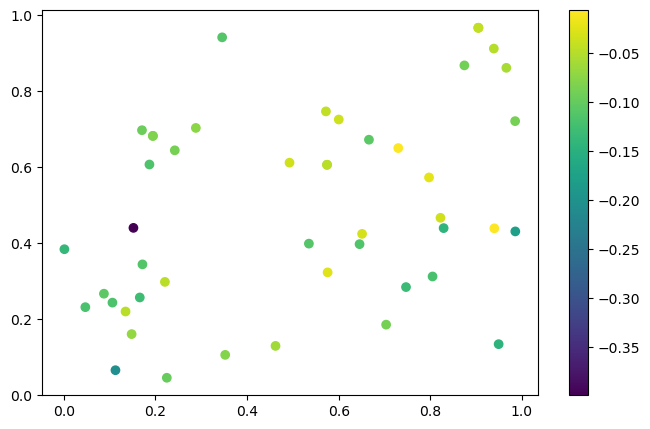

In [29]:
input_jun_2 = np.array([0.797181, 0.572684, 0.416644])
output_jun_2 = np.float64(-0.02260805709130096)

X = np.append(X, np.array([input_jun_2], dtype=np.float64), axis=0)
y = np.append(y, output_jun_2)

y_max = np.max(y)
print("Max y is ", y_max, "at: ", X[np.where(y == y_max)][0])

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

In [31]:
optimizer_v2.add_observation(input_jun_2, output_jun_2)

print(f"\n\n optimizer_v2 acquisition_func='ei'")

optimizer_v2.optimize_step(
    num_candidates=100000,
    acquisition_func='ei',
    kernel=kernel
)

Added observation: [0.797181 0.572684 0.416644] -> -0.0226


 optimizer_v2 acquisition_func='ei'
BAYESIAN OPTIMIZATION STEP
1. Computing function metrics...
   Current best: -0.0059
   Dataset size: 48
   Estimated noise: 0.0055

2. Updating surrogate model...
GP fitted with kernel: 1.13**2 * Matern(length_scale=0.193, nu=2.5) + WhiteKernel(noise_level=0.00961)
Log-marginal likelihood: -53.6905

3. Generating 100000 candidate samples...
4. Computing EI acquisition function...
5. Selecting best points for submission...

RECOMMENDED NEXT POINT:
Location: [0.96785049 0.5607003  0.45360595]
Acquisition: 0.0122
GP Prediction: -0.0171 ± 0.0433


{'best_point': array([0.96785049, 0.5607003 , 0.45360595]),
 'best_acquisition': 0.012245194077864844,
 'top_k_points': array([[0.96785049, 0.5607003 , 0.45360595],
        [0.94569912, 0.55795645, 0.46164996],
        [0.96985296, 0.53173271, 0.46466747],
        [0.96207069, 0.57509634, 0.47315516],
        [0.56625469, 0.65552056, 0.53503973]]),
 'top_k_acquisitions': array([0.01224519, 0.01223279, 0.01221707, 0.01216733, 0.01210912]),
 'gp_predictions': (array([-0.01706859, -0.0140593 , -0.01294711, -0.01942315, -0.02317978]),
  array([0.04325392, 0.04005686, 0.03881358, 0.0454466 , 0.04899015])),
 'current_best_observed': -0.005904023509414486,
 'current_best_point': array([0.939684, 0.438755, 0.426575])}